# Lok Sabha Elections 2024

##### Kunal Gupta Batch Code: 8905
##### Mentor: Rajshri Thete

##### https://github.com/KunalGupta00/Sprint_2

In [3]:
!pip install mysql-connector-python
!pip install pymysql
!pip3 install pymysql

# Import necessary packages

In [4]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Insight
Installed all necessary packages


In [5]:
connection = mysql.connector.connect(
    user='root',
    password='root',
    host='localhost',
    port=3306,
    database='lok_sabha_election'  # write here database name 
)

#### Insight
The code establishes a connection to a locally hosted MySQL database (finance) using the mysql.connector.connect method, allowing you to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

In [6]:
# SQL query to join Applicants and Loans tables
query = """
SELECT * 
FROM voter_details;
"""

# Exploratory Data Analysis

In [8]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query,connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()

C:\Users\User\AppData\Local\Temp\ipykernel_1932\1252240177.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_Of_Votes,Result
0,1,Uttar Pradesh,Varanasi,NARENDRA MODI,Bharatiya Janata Party,611439,1531,612970,54.24,Won
1,2,Uttar Pradesh,Varanasi,AJAY RAI,Indian National Congress,459084,1373,460457,40.74,Lost
2,3,Uttar Pradesh,Rae Bareli,RAHUL GANDHI,Indian National Congress,686044,1605,687649,66.17,Won
3,4,Uttar Pradesh,Lucknow,RAJ NATH SINGH,Bharatiya Janata Party,610597,2112,612709,53.89,Won
4,5,Uttar Pradesh,Kannauj,AKHILESH YADAV,Samajwadi Party,640207,2085,642292,52.74,Won


#### Insight
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

### Details_About_Column

##### 1)ID: A unique ID.
##### 2)State : Contains the names of the states and Union Territores of India.
##### 3)Constituency: Contains the names of the constituency in which the votes have been accounted for
##### 4)Candidate: There stood unique candidates in this year's Lok Sabha Elections. Each candidate was either from a party, or an independent candidate. 
##### 5)Party: A different parties had their registered candidates in the elections, including Independent candidates and 'None of the above (NOTA)"
##### 6)EVM_Votes: Number of EVM Votes secured by respective candidates. 
##### 7)EVM_Votes: Number of postal votes secured by respective candidates.
##### 8)Total _Votes: Total number of votes, by adding the postal votes and evm votes.
##### 9)Percentage_Of_Votes: Percentage of votes secured by that candidate, in that constituency.
##### 10)Result: Says whether that candidate won or lost.

### Data Overview

In [9]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape

(100, 10)

### Insight
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

In [10]:
# Gives the overall info of the dataframe object
df.describe()

,ID,EVM_Votes,Postal_Votes,Total_Votes,Percentage_Of_Votes
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,50.500000,5.799990e+05,3368.990000,5.833680e+05,45.648400
std,29.011492,2.025624e+05,2637.628448,2.038019e+05,13.728119
min,1.000000,5.148600e+04,173.000000,5.165900e+04,3.310000
25%,25.750000,4.628242e+05,1528.250000,4.655600e+05,37.872500
50%,50.500000,5.980455e+05,2542.000000,5.998520e+05,46.025000
75%,75.250000,7.007458e+05,4501.500000,7.041885e+05,54.097500
max,100.000000,1.223746e+06,13583.000000,1.226751e+06,78.540000


##### Insight
It provides statistics like count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) for each numerical column.

In [11]:
# for understanding stastical summary we will take ID

# 1. The count is 100.

# 2. The mean rating is 50.50 .

# 3. The standard deviation rating of the rating is 29.01.

# 4. The min ratings is 1.

# 5. The 25th percentile of the ratings is 25.75.

# 6. The 50th percentile of the ratings is 50.50.

# 7. The 75th percentile of the ratings is 75.25.

# 8. The maximum rating is 100.

In [12]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   100 non-null    int64  
 1   State                100 non-null    object 
 2   Constituency         100 non-null    object 
 3   Candidate            100 non-null    object 
 4   Party                100 non-null    object 
 5   EVM_Votes            100 non-null    int64  
 6   Postal_Votes         100 non-null    int64  
 7   Total_Votes          100 non-null    int64  
 8   Percentage_Of_Votes  100 non-null    float64
 9   Result               100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


##### Insight
It displays the number of non-null entries, data types of each column, memory usage, and the total number of columns and rows. This is useful for understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.

In [13]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

ID                     0
State                  0
Constituency           0
Candidate              0
Party                  0
EVM_Votes              0
Postal_Votes           0
Total_Votes            0
Percentage_Of_Votes    0
Result                 0
dtype: int64

##### Insight
It helps in identifying which columns have missing data and how many null values exist in each column. This is crucial for handling data cleaning tasks like imputing or removing missing values.

# Check for duplicates

In [14]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


#### Insight
This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.



In [15]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   100 non-null    int64  
 1   State                100 non-null    object 
 2   Constituency         100 non-null    object 
 3   Candidate            100 non-null    object 
 4   Party                100 non-null    object 
 5   EVM_Votes            100 non-null    int64  
 6   Postal_Votes         100 non-null    int64  
 7   Total_Votes          100 non-null    int64  
 8   Percentage_Of_Votes  100 non-null    float64
 9   Result               100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


#### Insight
Check data is fill or not hear all non-null value fill by 0

C:\Users\User\AppData\Local\Temp\ipykernel_1932\3210909751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_votes.values, y=party_votes.index, palette='viridis')


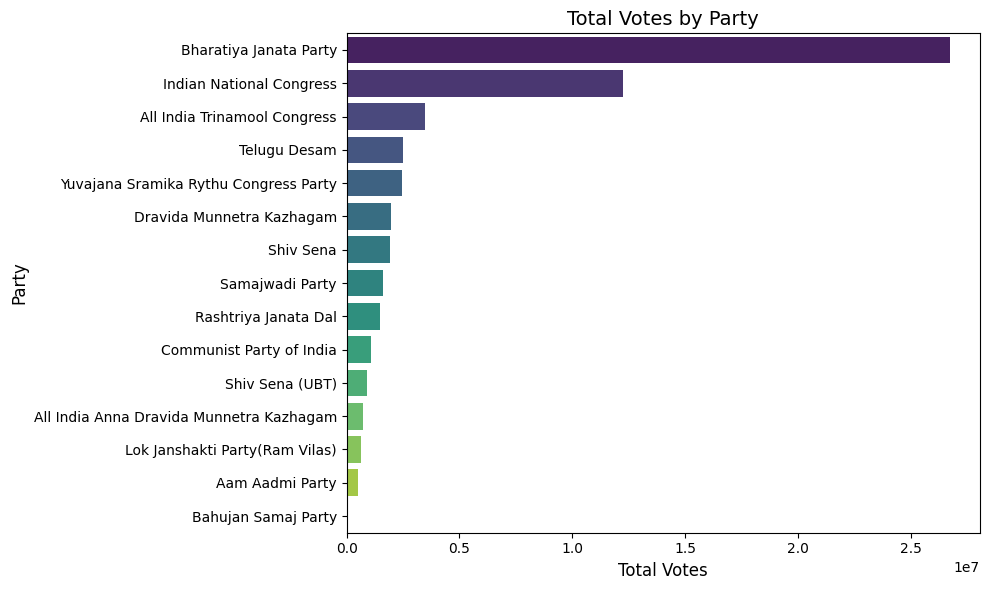

In [55]:
# Grouping data by Party to calculate total votes
party_votes = df.groupby('Party')['Total_Votes'].sum().sort_values(ascending=False)

# Create the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=party_votes.values, y=party_votes.index, palette='viridis')
plt.title('Total Votes by Party', fontsize=14)
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('Party', fontsize=12)
plt.tight_layout()
plt.show()

### Insight :
##### Total Votes by Party: The bar chart visualizes the total number of votes received by each political party. The parties are sorted in descending order of total votes, so the party with the highest votes appears at the top (or left, depending on chart orientation).

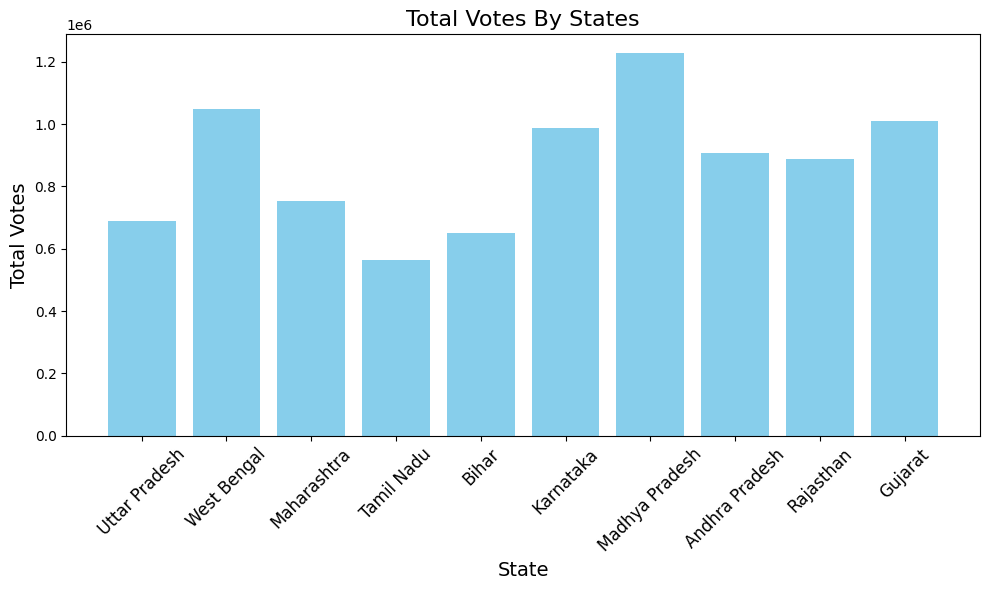

In [32]:
# Create a DataFrame to simulate the grouped and sorted data
total_votes_per_state = pd.DataFrame(df)

# Create a bar chart for the top 10 states by total votes
plt.figure(figsize=(10, 6))
plt.bar(total_votes_per_state["State"], total_votes_per_state["Total_Votes"], color='skyblue')
plt.title("Total Votes By States", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Total Votes", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Display the bar chart
plt.show()


### Insight:
##### The chart provides insights into the distribution of total votes by state: The states with the tallest bars (highest votes) represent areas with larger voter participation or higher population density, depending on the context.
##### Shorter bars represent states with lower total votes

C:\Users\User\AppData\Local\Temp\ipykernel_1932\2502090739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_wins, y=party_wins.index, palette='colorblind')


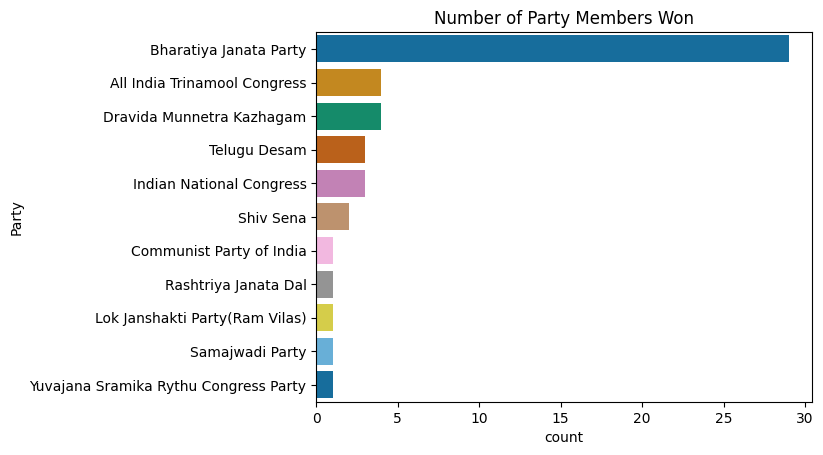

In [18]:
party_wins = df[df['Result'] == 'Won'].value_counts('Party')

plt.title('Number of Party Members Won')
sns.barplot(x=party_wins, y=party_wins.index, palette='colorblind')
plt.show()

### Insight:
##### The bar chart visualizes how many party members won in the election. Here are the key insights that can be drawn from this visualization:
##### The parties with the highest bars represent the ones that had the most members win. This shows which parties performed best in terms of securing victories for their candidates.
##### Party Performance: If some parties have significantly higher bars, it suggests they had a stronger showing in the election, with more candidates securing wins. Conversely, parties with shorter bars had fewer wins.

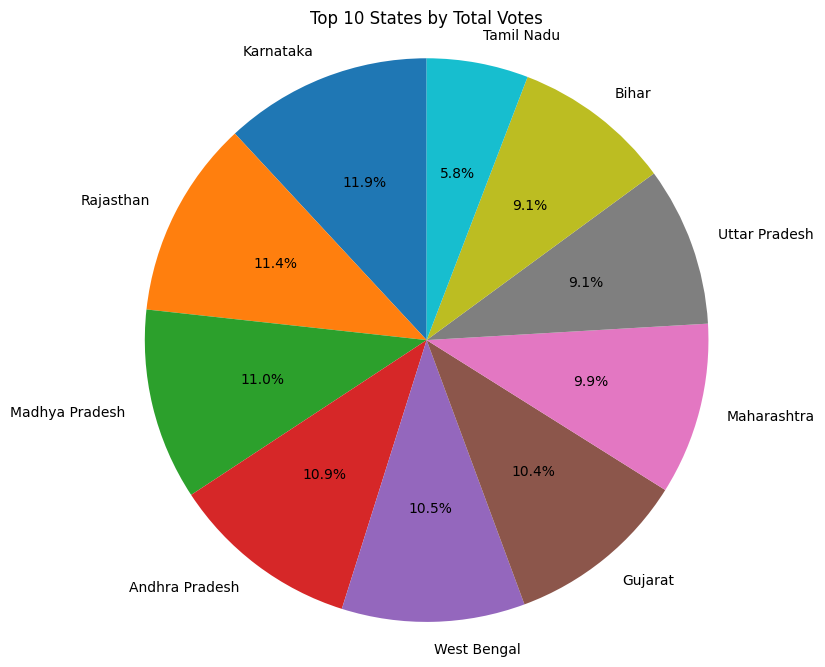

In [27]:
# Get the top 10 states by total votes
total_votes_per_state = df.groupby('State')['Total_Votes'].sum()
total_votes_per_state = total_votes_per_state.sort_values(ascending=False).head(10)

# Convert 'Total Votes' to numeric if necessary
total_votes_per_state = pd.to_numeric(total_votes_per_state)

# Create a pie chart for the total votes per state
plt.figure(figsize=(8, 8))
plt.pie(total_votes_per_state, labels=total_votes_per_state.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 States by Total Votes')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

### Insight:

##### The pie chart visualizes the distribution of total votes across the top 10 states.

##### Proportional Representation:

##### Each slice of the pie chart represents a state, and the size of each slice corresponds to the total number of votes in that state relative to the total votes across the top 10 states. The percentage label on each slice shows what portion of the total votes from the top 10 states each state represents. This helps identify which states contribute the most votes.

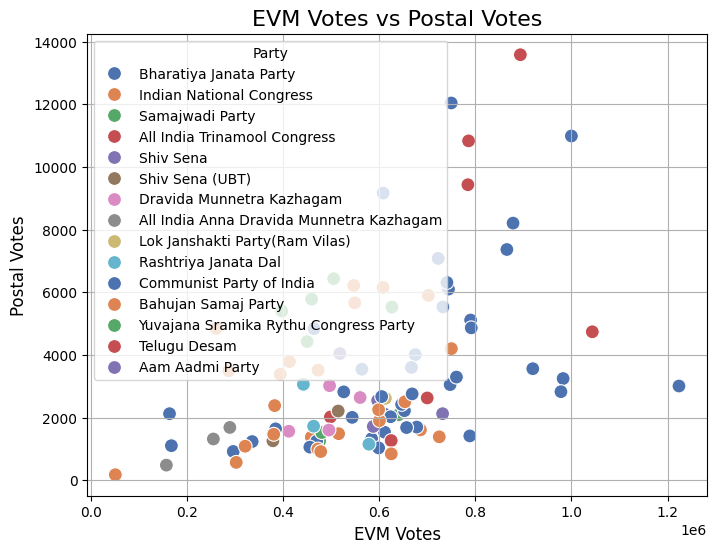

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="EVM_Votes", y="Postal_Votes", hue="Party", palette="deep", s=100)
plt.title("EVM Votes vs Postal Votes", fontsize=16)
plt.xlabel("EVM Votes", fontsize=12)
plt.ylabel("Postal Votes", fontsize=12)
plt.grid()
plt.show()

### Insight:

##### Correlation Between EVM and Postal Votes: If the points in the scatter plot show a linear pattern (either positive or negative), it suggests that there might be a correlation between the number of EVM votes and Postal votes. For example, if parties that have more EVM votes also tend to have more Postal votes, it indicates that both voting methods might be similarly popular in certain states or constituencies. A random spread of points would indicate that there is no strong correlation between EVM votes and Postal votes.

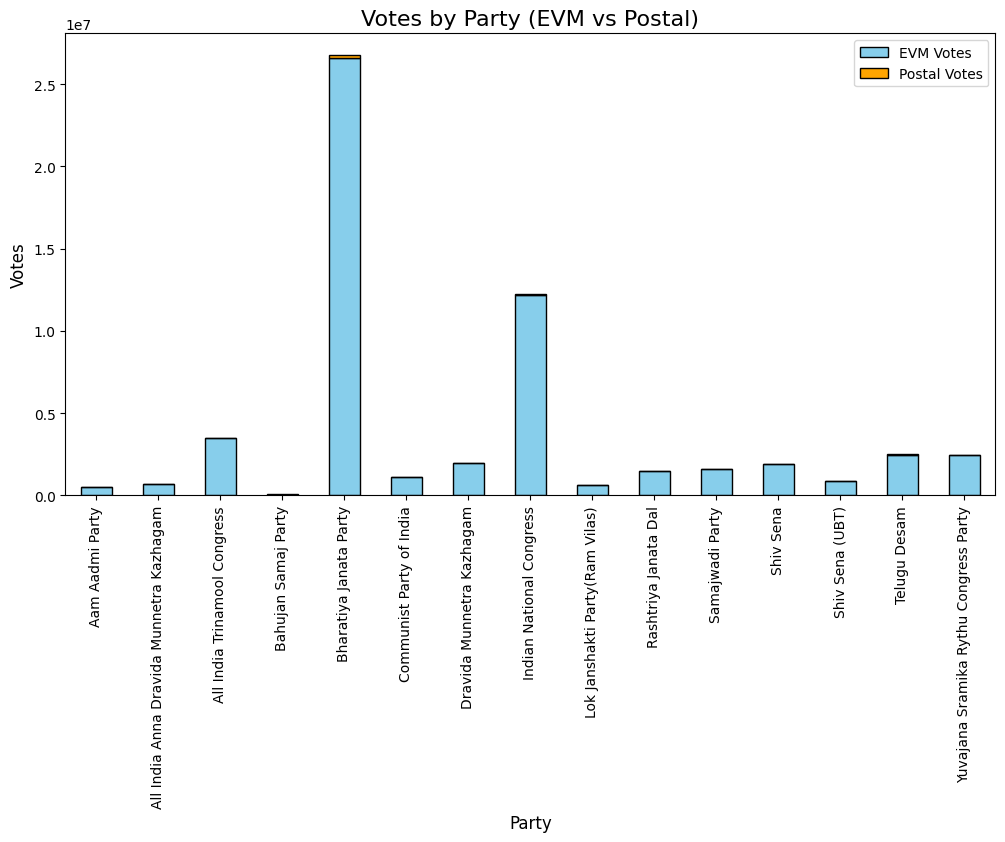

In [56]:
# Grouping by party for stacked bar chart
votes_by_party = df.groupby("Party")[["EVM_Votes", "Postal_Votes"]].sum()

# Stacked bar chart
votes_by_party.plot(
    kind="bar", stacked=True, figsize=(12, 6), color=["skyblue", "orange"], edgecolor="black"
)
plt.title("Votes by Party (EVM vs Postal)", fontsize=16)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Votes", fontsize=12)
plt.xticks(rotation=90)
plt.legend(["EVM Votes", "Postal Votes"])
plt.show()

### Insight:

##### Total Votes by Party:

##### The height of each bar represents the total number of votes for each party (both EVM and Postal votes combined). Parties with taller bars have received more votes overall, while shorter bars represent parties with fewer total votes. 

##### Distribution of Votes (EVM vs Postal):

##### The chart shows how each party's total votes are divided between EVM and Postal votes. For each party, the bar is split into two parts: the bottom part representing Postal votes (colored orange) and the top part representing EVM votes (colored sky blue).

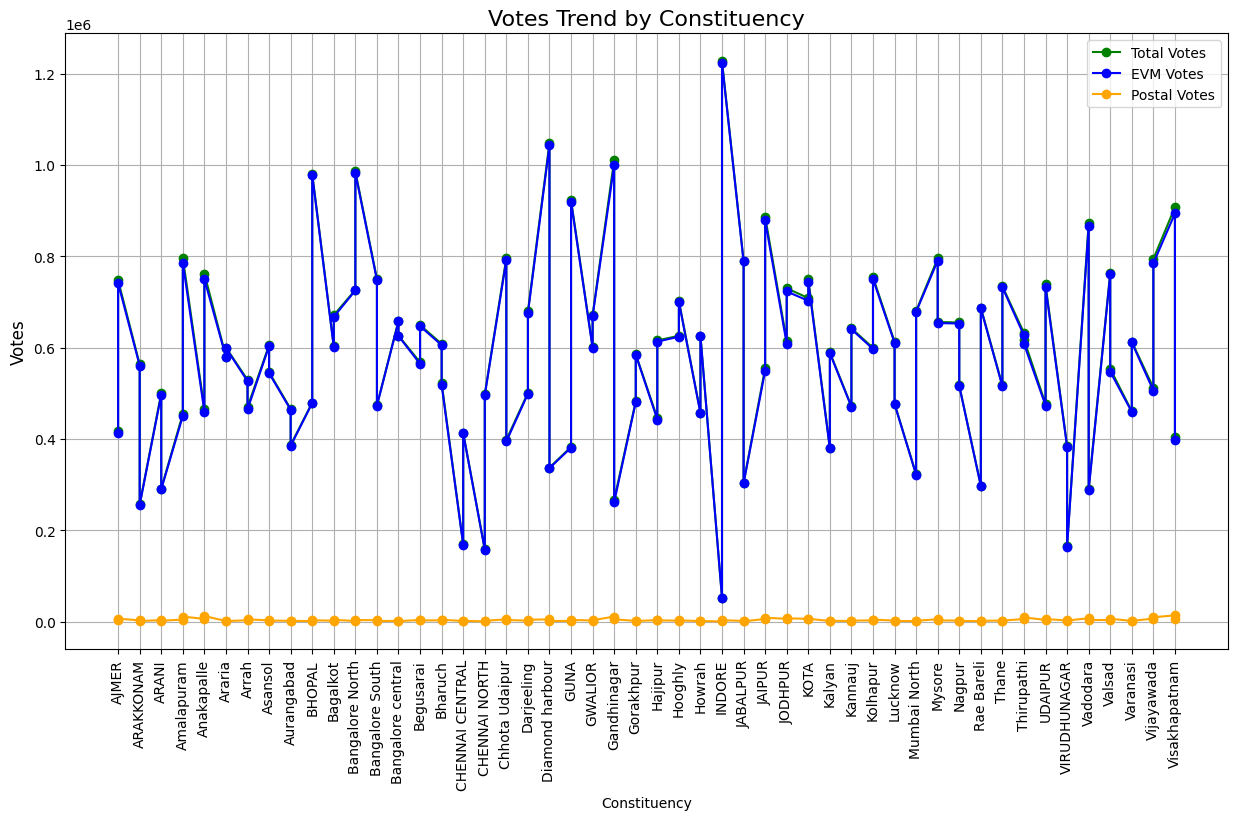

In [49]:
# Sorting data by constituency
df_sorted = df.sort_values("Constituency")

# Plotting the line chart
plt.figure(figsize=(15,8))
plt.plot(df_sorted["Constituency"], df_sorted["Total_Votes"], marker="o", label="Total Votes", color="green")
plt.plot(df_sorted["Constituency"], df_sorted["EVM_Votes"], marker="o", label="EVM Votes", color="blue")
plt.plot(df_sorted["Constituency"], df_sorted["Postal_Votes"], marker="o", label="Postal Votes", color="orange")

# Adding title and labels
plt.title("Votes Trend by Constituency", fontsize=16)
plt.xlabel("Constituency", fontsize=10)
plt.ylabel("Votes", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

### Insight:

##### The lines show how the number of votes for each category (Total, EVM, Postal) changes across different constituencies. For example, if a line shows a consistent upward or downward trend, it suggests that the number of votes in that category (e.g., EVM Votes) is increasing or decreasing across constituencies. A flat line for any of the categories indicates that the number of votes remains constant across constituencies for that specific type of vote (Total, EVM, or Postal).

## Conclusion
#### The data appears to contain information about election results, including details such as the state, constituency, candidates, party names, votes (EVM and postal), and the results.
#### The election results show candidates from different parties contesting across constituencies. Each row includes the candidate’s total votes, percentage of votes, and whether they won or lost
#### The data based on 2024 election of india across diffrent cities state 

## Recommendation

### Targeted Voter Engagement:
#### Based on demographic insights, political parties should adopt targeted voter engagement strategies. Younger voters, women, and economically marginalized groups may require tailored outreach through specific media channels like social media or grassroots campaigns to enhance engagement and drive turnout.




### Strengthen Social Media Campaigns:
#### Data on the influence of social media indicates that online platforms are becoming a critical battleground for shaping public opinion.




### Invest in Voter Education and Awareness Programs:
#### Election commissions and non-profit organizations should invest in long-term voter education programs to increase awareness of the electoral process, the importance of voting, and the consequences of political choices. Such efforts could particularly target first-time voters and those in rural or marginalized communities.